In [1]:
%load_ext autoreload
%autoreload 2

from omegaconf import OmegaConf
import wandb_util.wandb_util as wbu
from scripts.wandb_experiments.benchmark import Scene, BenchmarkConfig

In [2]:
metal_cat = Scene(
    "cat_statue_mv:latest",
    "cat_statue_mv:latest",
    "Metalic Cat Statue",
    "Silver Cat Statue",
)

deadpool_cat = Scene(
    "cat_statue_mv:latest",
    "cat_statue_mv:latest",
    "Deadpool Cat Statue",
    "Deadpool Cat Statue",
)

stormtrooper_ymca = Scene(
    "ymca_20:latest", "human_mv:latest", "Stormtrooper", "Stormtrooper"
)

stormtrooper_catwalk = Scene(
    "catwalk_180_20:latest",
    "human_mv:latest",
    "Stormtrooper",
    "Stormtrooper",
)

stormtrooper_rumba = Scene(
    "rumba_20:latest", "human_mv:latest", "Stormtrooper", "Stormtrooper"
)

deadpool_catwalk = Scene(
    "catwalk_180_20:latest",
    "human_mv:latest",
    "Deadpool, blank background",
    "Deadpool",
)


scenes = [
    metal_cat,
    deadpool_cat,
    stormtrooper_ymca,
    stormtrooper_catwalk,
    stormtrooper_rumba,
    deadpool_catwalk,
]

config = BenchmarkConfig(scenes)
config = OmegaConf.structured(config)

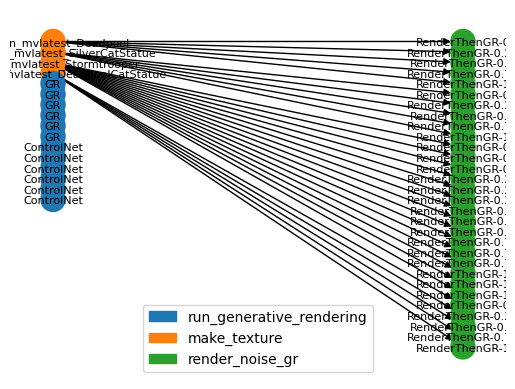

In [4]:
from scripts.wandb_experiments.benchmark import benchmark

spec = benchmark(config)

wbu.visualize_spec(spec, with_labels=True)

In [6]:
from scripts.wandb_experiments.benchmark import benchmark

wbu.sync_experiment(benchmark, config, "benchmark_small")

Experiment: https://wandb.ai/romeu/diffusion-3D-features/groups/benchmark_small/workspace
Experiment up-to-date!


In [7]:
from scripts.wandb_experiments.benchmark import split_runs

exp_name = "benchmark_small"

runs = wbu.get_logged_runs(exp_name)
print(wbu.get_exp_url(exp_name))
texture_runs, video_gen_runs = split_runs(runs)

https://wandb.ai/romeu/diffusion-3D-features/groups/benchmark_small/workspace


In [18]:
from text3d2video.util import group_into_array


def scene_key(run):
    config = OmegaConf.create(run.config)
    return f"{config.animation_tag}-{config.prompt}"


def method_key(run):
    return run.name.split("_")[0]


runs_grouped, labels = group_into_array(video_gen_runs, [method_key, scene_key])

methods = ["ControlNet", "GR"]
method_indices = [labels[0].index(m) for m in methods]

runs_grouped = runs_grouped[method_indices]
runs_grouped.shape

(2, 6)

In [19]:
from scripts.wandb_experiments.benchmark import LoggedVideo
from text3d2video.artifacts.video_artifact import VideoArtifact
from text3d2video.util import map_array

videos_grid = map_array(runs_grouped, LoggedVideo.from_run, pbar=True)

wandb:   20 of 20 files downloaded.  
wandb:   20 of 20 files downloaded.  
100%|██████████| 12/12 [00:15<00:00,  1.29s/it]


In [21]:
from text3d2video.utilities.video_comparison import video_grid
from text3d2video.utilities.video_util import pil_frames_to_clip

vids = map_array(videos_grid, lambda x: pil_frames_to_clip(x.frames))

vid = video_grid(vids, y_labels=labels[0])
vid.write_videofile("outs/benchmark_qualitative.mp4")

 24%|██▍       | 10/42 [02:08<00:54,  1.70s/it]

Moviepy - Building video outs/benchmark_qualitative.mp4.
Moviepy - Writing video outs/benchmark_qualitative.mp4



 24%|██▍       | 10/42 [02:12<00:54,  1.70s/it]

Moviepy - Done !
Moviepy - video ready outs/benchmark_qualitative.mp4


In [10]:
r = video_gen_runs[0]

In [31]:
from text3d2video.utilities.ipython_utils import display_vid

scene = 3
method = 1

display_vid(vids[1,scene])